# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.set_palette('husl')

# Load Training Data

In [ ]:
train_df = pd.read_csv('student_marks_train.csv')
print(train_df.info())
print("\n",train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   maths        120 non-null    int64 
 1   sinhala      120 non-null    int64 
 2   english      120 non-null    int64 
 3   history      120 non-null    int64 
 4   class-label  120 non-null    object
dtypes: int64(4), object(1)
memory usage: 4.8+ KB
None

    maths  sinhala  english  history class-label
0     38       32       66       48        pass
1     60       78       94       47        fail
2     39       29       67       49        pass
3     59       84       94       55        fail
4     55       73       80       46        fail


# Load Test Data

In [ ]:
test_df = pd.read_csv('student_marks_test.csv')
print(test_df.info())
print("\n",test_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   maths    30 non-null     int64
 1   sinhala  30 non-null     int64
 2   english  30 non-null     int64
 3   history  30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB
None

    maths  sinhala  english  history
0     61       73       80       51
1     39       31       66       47
2     56       68       75       44
3     48       47       68       42
4     38       32       66       48


# Explore the data

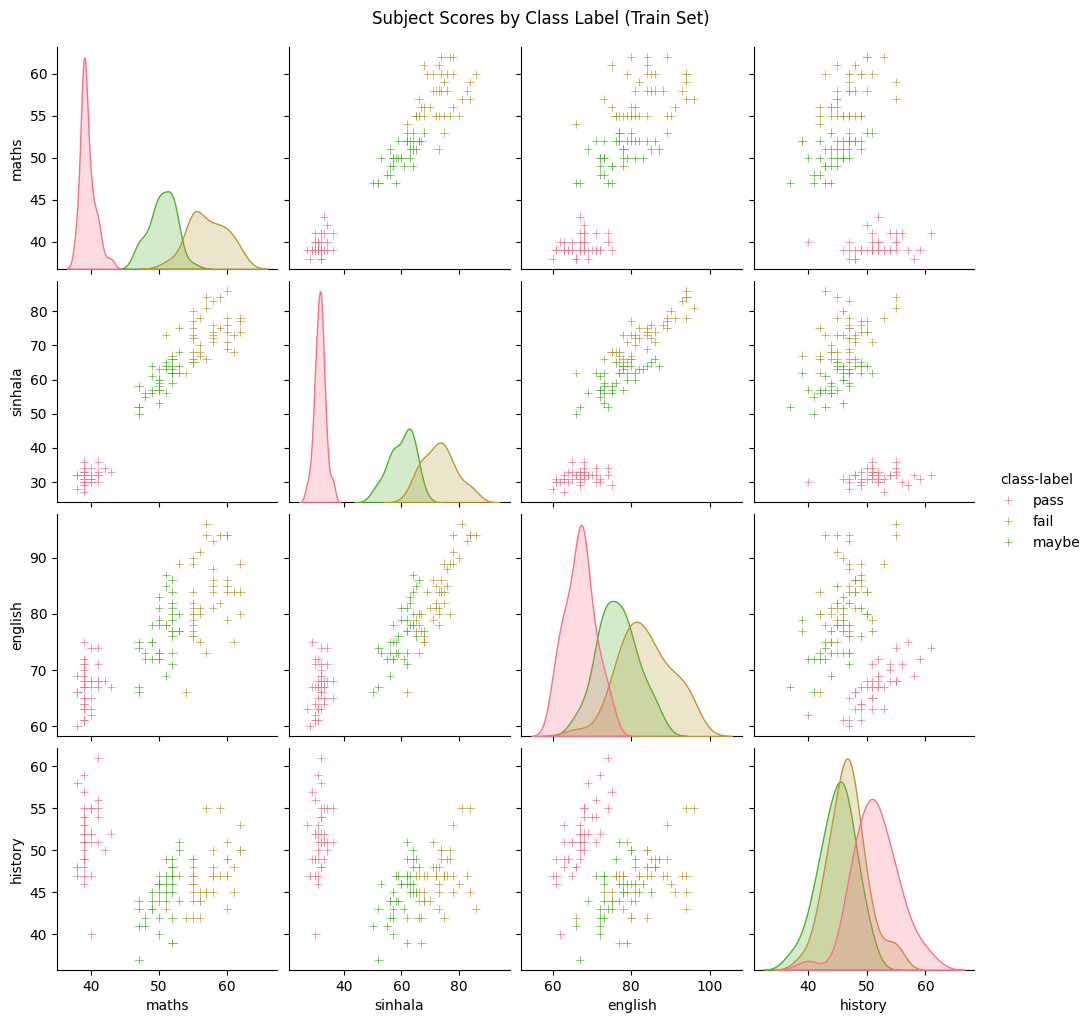

In [ ]:
sns.pairplot(train_df, hue='class-label', markers='+')
plt.suptitle("Subject Scores by Class Label (Train Set)", y=1.02)
plt.show()

#Feature and Target Separation

In [ ]:
X = train_df.drop(['class-label'], axis=1)
y = train_df['class-label']
print(f'\n Feature shape: {X.shape} | Target shape: {y.shape}')


 Feature shape: (120, 4) | Target shape: (120,)


#Split Data Into Train and Validation


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

#Train Model

In [ ]:
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

#Validate Model

In [ ]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 93.33%
Classification Report:
               precision    recall  f1-score   support

        fail       0.95      0.86      0.90        21
       maybe       0.86      0.95      0.90        19
        pass       1.00      1.00      1.00        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60

Confusion Matrix:
 [[18  3  0]
 [ 1 18  0]
 [ 0  0 20]]


#Predict Final Test Set (no labels)

In [ ]:
final_predictions = model.predict(test_df)

#Output Results

In [ ]:
for label in final_predictions:
    print(label)

fail
pass
fail
maybe
pass
pass
pass
maybe
fail
fail
fail
maybe
pass
maybe
fail
maybe
maybe
pass
maybe
maybe
pass
maybe
fail
maybe
maybe
fail
pass
fail
maybe
pass
